In [1]:
# import library pandas and numpy and read the csv file and print it

import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW5/wine_flag_all.csv")

df


,Type,Alcohol_flag,Sugar_flag
0,Red,High,High
1,Red,High,Low
2,Red,Low,High
3,Red,High,Low
4,Red,Low,Low
...,...,...,...
3340,White,High,High
3341,White,High,Low
3342,White,High,Low
3343,White,High,Low


In [2]:
# type: 0 is red, 1 is white. alcohol and sugar, 0 is high and 1 is low
# create a  dataframe between 0 and 1
# using a loop to test
# encode all categoric attribute 

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

encoded_df = pd.DataFrame()

for i in range(0, df.shape[1]):
    if df.dtypes[i]=='object' or df.dtypes[i]=='bool':
        encoded_df[df.columns[i]] = le.fit_transform(df[df.columns[i]])
        
print(df)

print(encoded_df)



       Type Alcohol_flag Sugar_flag
0       Red         High       High
1       Red         High        Low
2       Red          Low       High
3       Red         High        Low
4       Red          Low        Low
...     ...          ...        ...
3340  White         High       High
3341  White         High        Low
3342  White         High        Low
3343  White         High        Low
3344  White         High        Low

[3345 rows x 3 columns]
      Type  Alcohol_flag  Sugar_flag
0        0             0           0
1        0             0           1
2        0             1           0
3        0             0           1
4        0             1           1
...    ...           ...         ...
3340     1             0           0
3341     1             0           1
3342     1             0           1
3343     1             0           1
3344     1             0           1

[3345 rows x 3 columns]


In [3]:
# test whether is there any missing value, false means there is no missing value
df.isnull().sum()



Type            0
Alcohol_flag    0
Sugar_flag      0
dtype: int64

In [4]:
# create the contigency table and cross tabulation of type and alcohol
ctab = pd.crosstab( df.Type,df.Alcohol_flag,margins=True)
ctab


Alcohol_flag,High,Low,All
Type,,,
Red,485,600,1085
White,1176,1084,2260
All,1661,1684,3345


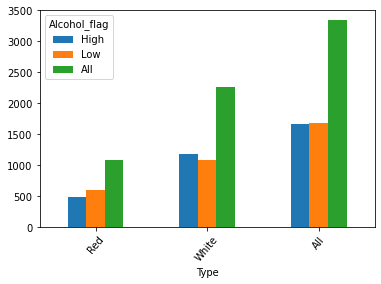

In [5]:
# create a barplot of tpye and alcohol

barplot=ctab.plot.bar(rot=50)



In [7]:
# create the contigency table and cross tabulation of type and sugar
ctab_2 = pd.crosstab( df.Type,df.Sugar_flag,margins=True)
ctab_2


Sugar_flag,High,Low,All
Type,,,
Red,237,848,1085
White,1382,878,2260
All,1619,1726,3345


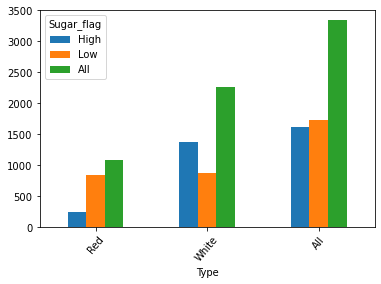

In [8]:
# create a barplot of  type and sugar
barplot=ctab_2.plot.bar(rot=50)


In [10]:
# calculate the probability of red wine, using total of red / total of wine
#from alcohol contigency table
prior_red = (ctab.iloc[0,1]+ctab.iloc[0,2])/(ctab.iloc[2,1]+ctab.iloc[2,2])
prior_red


0.33505667130642275

In [11]:
# calculate the probability of white wine, using total of white / total of wine
#from alcohol contigency table
prior_white = (ctab.iloc[1,1]+ctab.iloc[1,2])/(ctab.iloc[2,1]+ctab.iloc[2,2])
prior_white


0.6649433286935773

In [12]:
#calculate the probability of high alcohol, using total of high / total of high + low
#from alcohol contigency table
prior_achol__high = (ctab.iloc[2,1])/(ctab.iloc[2,1]+ctab.iloc[2,2])
prior_achol__high


0.33485782461722013

In [14]:
#calculate the probability of low alcohol, using total of low / total of high + low
#from alcohol contigency table
prior_achol__low = (ctab.iloc[2,2])/(ctab.iloc[2,1]+ctab.iloc[2,2])
prior_achol__low



0.6651421753827799

In [15]:
#calculate the probability of high sugar, using total of high / total of high + low
# from sugar contigency table
prior_sugar_high = (ctab_2.iloc[2,1])/(ctab_2.iloc[2,1]+ctab_2.iloc[2,2])
prior_sugar_high


0.3403667915598501

In [16]:
#calculate the probability of low sugar, using total of low / total of high + low 
#from sugar contigency table

prior_sugar_low= (ctab_2.iloc[2,2])/(ctab_2.iloc[2,1]+ctab_2.iloc[2,2])
prior_sugar_low


0.6596332084401498

In [17]:
# calculate the conditional probabilities p(Alcohol_flag = High ∣ Type = Red)

conditional_red_hig=(ctab.iloc[0,1]+ctab.iloc[0,2])/(ctab.iloc[2,1]+ctab.iloc[2,2]) * ((ctab.iloc[2,1])/(ctab.iloc[2,1]+ctab.iloc[2,2]))

conditional_red_hig


0.11219634807715569

In [18]:
# calculate the conditional probabilities p(Alcohol_flag = low ∣ Type = Red)

conditional_red_low=(ctab.iloc[0,1]+ctab.iloc[0,2])/(ctab.iloc[2,1]+ctab.iloc[2,2])*((ctab.iloc[2,2])/(ctab.iloc[2,1]+ctab.iloc[2,2]))

conditional_red_low  


0.22286032322926708

In [19]:
# calculate the conditional probabilities p(sugar_flag = high ∣ Type = Red)

conditional_Sred_hig= (ctab_2.iloc[0,1]+ctab_2.iloc[0,2])/(ctab_2.iloc[2,1]+ctab_2.iloc[2,2]) *((ctab_2.iloc[2,1])/(ctab_2.iloc[2,1]+ctab_2.iloc[2,2]))

conditional_Sred_hig


0.12974344470226587

In [20]:
# calculate the conditional probabilities p(sugar_flag = low ∣ Type = Red)

conditional_Sred_low= (ctab_2.iloc[0,1]+ctab_2.iloc[0,2])/(ctab.iloc[2,1]+ctab_2.iloc[2,2]) *((ctab_2.iloc[2,2])/(ctab_2.iloc[2,1]+ctab_2.iloc[2,2]))

conditional_Sred_low


0.2535436452405666

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Prepare input and output 
X = encoded_df.iloc[:,0:2]
y = encoded_df.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2, stratify=y)

# show the sets
print(X_train)
print(X_test)


      Type  Alcohol_flag
1783     1             1
110      0             1
2936     1             0
2326     1             1
612      1             1
...    ...           ...
3074     1             0
2259     1             1
1524     0             0
1629     1             1
512      1             1

[2676 rows x 2 columns]
      Type  Alcohol_flag
1779     1             1
3176     1             0
2544     1             0
1470     0             0
810      1             0
...    ...           ...
1979     1             1
2923     1             0
1518     0             0
998      1             1
1342     0             0

[669 rows x 2 columns]


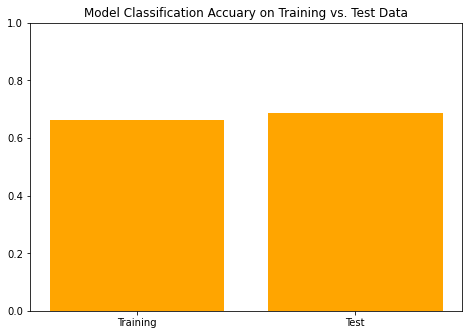

In [22]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()



In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Prepare input and output 
X = encoded_df.iloc[:,0:2]
y = encoded_df.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.25, stratify=y)

# show the sets
print(X_train)
print(X_test)


      Type  Alcohol_flag
3303     1             0
1633     1             1
813      1             0
2700     1             0
2594     1             0
...    ...           ...
626      1             1
2259     1             1
3002     1             0
1033     0             1
512      1             1

[2508 rows x 2 columns]
      Type  Alcohol_flag
1065     0             1
1160     0             1
816      1             1
1468     0             0
876      1             0
...    ...           ...
1899     1             1
1886     1             1
2003     1             1
499      0             0
640      1             0

[837 rows x 2 columns]


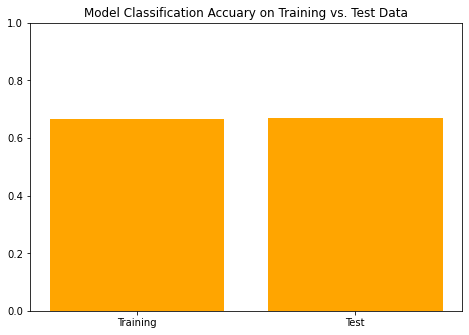

In [24]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Prepare input and output 
X = encoded_df.iloc[:,0:2]
y = encoded_df.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3, stratify=y)

# show the sets
print(X_train)
print(X_test)


      Type  Alcohol_flag
833      1             1
1582     0             0
469      0             1
2489     1             0
2099     1             1
...    ...           ...
2947     1             0
2808     1             0
2259     1             1
227      0             1
512      1             1

[2341 rows x 2 columns]
      Type  Alcohol_flag
549      1             1
3199     1             0
1028     0             1
2959     1             0
2653     1             0
...    ...           ...
3029     1             0
486      0             1
2342     1             1
2800     1             0
446      0             1

[1004 rows x 2 columns]


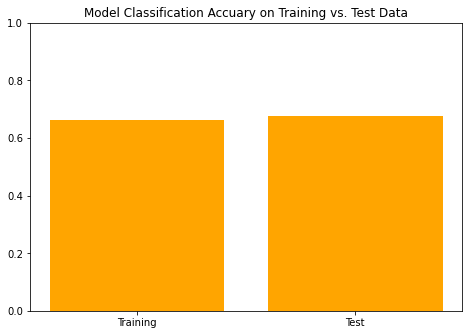

In [26]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Prepare input and output 
X = encoded_df.iloc[:,0:2]
y = encoded_df.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.4, stratify=y)

# show the sets
print(X_train)
print(X_test)


      Type  Alcohol_flag
1927     1             1
547      1             0
1742     1             1
360      0             1
424      0             1
...    ...           ...
2454     1             0
2259     1             1
2855     1             0
325      0             1
512      1             1

[2007 rows x 2 columns]
      Type  Alcohol_flag
3340     1             0
89       0             1
904      1             0
2360     1             1
301      0             1
...    ...           ...
2839     1             0
1333     0             0
594      1             1
2814     1             0
2321     1             1

[1338 rows x 2 columns]


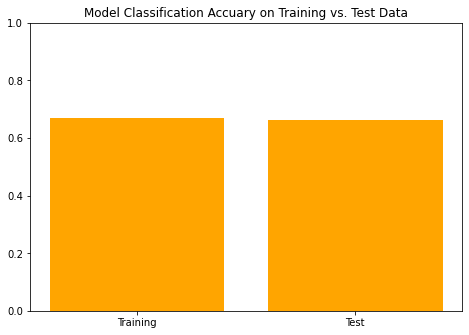

In [28]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Prepare input and output 
X = encoded_df.iloc[:,0:2]
y = encoded_df.iloc[:,2]

# In order to have the same proportion of 0 and 1 classes in a dataset to train, use 'stratify'
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, test_size=0.5, stratify=y)

# show the sets
print(X_train)
print(X_test)


      Type  Alcohol_flag
25       0             1
2489     1             0
583      1             0
1396     0             0
2032     1             1
...    ...           ...
2499     1             0
238      0             0
2855     1             0
2795     1             0
908      1             0

[1672 rows x 2 columns]
      Type  Alcohol_flag
1881     1             1
1957     1             1
1589     1             1
3038     1             0
386      0             0
...    ...           ...
2985     1             0
2615     1             0
42       0             1
2580     1             0
2914     1             0

[1673 rows x 2 columns]


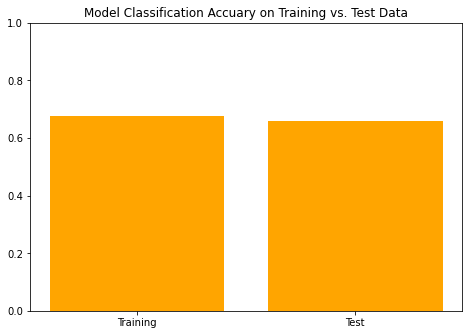

In [30]:
import matplotlib.pyplot as plt

# Train the model 
NBmodel.fit(X_train, y_train)

# Calculate model accuracy on both training and test data
labels = ["Training", "Test"]
scores = [NBmodel.score(X_train, y_train), NBmodel.score(X_test, y_test)]


# Plot the accuracy claues
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('Model Classification Accuary on Training vs. Test Data')
ax.bar(labels, scores, color="orange")
ax.set_ylim(0, 1)
plt.show()